### Principle Component Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784')

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
X = mnist.data
y = mnist.target

In [7]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [9]:
from sklearn.decomposition import PCA

In [10]:
X.shape

(70000, 784)

In [11]:
pca = PCA(n_components=2) 
pca.fit(X)
X_pca = pca.transform(X) # transform data onto the first two principal components

In [12]:
X_pca

array([[ 122.25525533,  316.23384391],
       [1010.49400346,  289.96362059],
       [ -58.99594719, -393.69744499],
       ...,
       [-271.50701323, -590.07850009],
       [-310.22482291,  116.72715081],
       [1058.86212574,   83.39253843]])

In [13]:
X_pca.shape

(70000, 2)

In [15]:
y = y.astype('int')

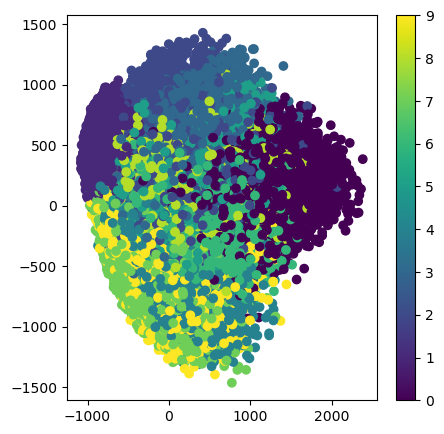

In [16]:
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 100

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.colorbar()
plt.show()

### Data Compression Analysis

In [ ]:
pca.explained_variance_ratio_ # the amount of variance explained by each of the selected components 

array([0.09746116, 0.07155445])

In [18]:
X.shape[1]/X_pca.shape[1]

392.0

In [20]:
import sys
sys.getsizeof(X)//(2**20), 418/392, sys.getsizeof(X_pca)/(2**20)
# the size of the original data is 418 MB, the size of the data after PCA is 392 MB,
# which is 94% of the original size


(418, 1.066326530612245, 1.0682373046875)